# Hyperparameter Tuning

In [20]:
import numpy as np
import seaborn as sns

sns.set_theme(context="poster", style="whitegrid")

In [137]:
def random_from(lo, hi):
    """Return a value in the range [lo, hi]."""
    return (hi - lo) * np.random.random() + lo


def train_nn(*hyperparameters):
    """Fake function to show where you'd put your NN training code."""
    return sum(hyperparameters)

In [138]:
# Computing a random value like this is problematic.
# Most (90%) of the values are in the 0.1 to 1 range
learning_rate = random_from(0.001, 1)
learning_rate

0.4434568383301565

Text(0.5, 1.0, 'More values in the upper end')

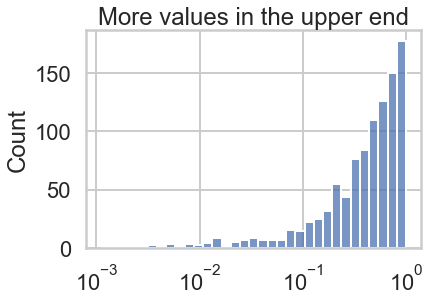

In [139]:
random_learning_rates = [random_from(0.001, 1) for _ in range(1000)]
ax = sns.histplot(random_learning_rates, log_scale=True)
ax.set_title("More values in the upper end")

In [140]:
# Let's use a logarithmic scale
lo = np.log10(0.001)
hi = np.log10(1)
lo, hi

(-3.0, 0.0)

In [141]:
# By randomly generating the exponent, we get values in
# a logarithmic scale.
exponent = random_from(lo, hi)
learning_rate = 10 ** exponent
learning_rate

0.532318778750375

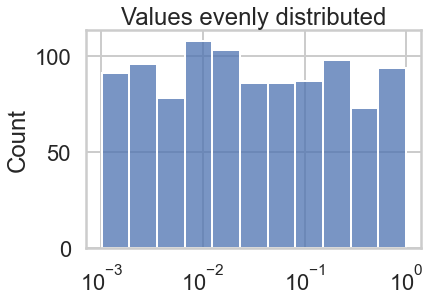

In [142]:
def rand_lr(lo, hi):
    return 10 ** random_from(np.log10(lo), np.log10(hi))


random_learning_rates = [rand_lr(0.001, 1) for _ in range(1000)]
ax = sns.histplot(random_learning_rates, log_scale=True)
ax.set_title("Values evenly distributed");

In [143]:
# Hyperparamter for exponential smoothing
# 0.9 that is going to average the previous 10 values
# 0.999 that is going to aver the previous 1000 values
# beta is usually chosen from 0.9 to 0.9999
# 0.9, 0.99, 0.999, 0.9999
# we care less about seeing 0.91 (almost the same as 0.9)
# we care less abuot seeing 0.991 (almost the same as 0.99)
# 0.9005
# Exponential smoothing is more sensitive to values in the
# upper part of the range.
# 0.900 --> 0.9005
# 0.999 --> 0.9995 (bigger impact on the final result)

# 0.9 = 1 - 0.1
# 0.99 = 1 - 0.01
# 0.999 = 1 - 0.001

lo = np.log10(1 - 0.9999)
hi = np.log10(1 - 0.9)

exponent = random_from(lo, hi)

beta = 1 - 10 ** exponent
beta, lo, hi

(0.979180303653293, -4.000000000000048, -1.0)

In [144]:
def rand_beta(lo, hi):
    return 1 - 10 ** random_from(np.log10(1 - hi), np.log10(1 - lo))


random_betas = [rand_beta(0.9, 0.9999) for _ in range(1000)]

bin_ranges = [0.9, 0.99, 0.999, 0.9999]
bins = [0] * len(bin_ranges[1:])
for rbeta in random_betas:
    for ibin, bin_lim in  enumerate(bin_ranges[1:]):
        if rbeta < bin_lim:
            bins[ibin] += 1
            break

for blo, bhi, bcount in zip(bin_ranges, bin_ranges[1:], bins):
    print(f"{bcount} values in range [{blo}, {bhi}]")

329 values in range [0.9, 0.99]
328 values in range [0.99, 0.999]
343 values in range [0.999, 0.9999]


## Grid Search

Systematically check all sets of parameter values. This is not a recommended approach

In [147]:
learning_rates = [10**-r for r in range(3)]

betas = [1 - 10**-r for r in range(1, 4)]

dropout_rates = [0.1 + i/10 for i in range(3)]

learning_rates, betas, dropout_rates

([1, 0.1, 0.01], [0.9, 0.99, 0.999], [0.1, 0.2, 0.30000000000000004])

In [151]:
for lr in learning_rates:
    for beta in betas:
        for droprate in dropout_rates:
            loss = train_nn(lr, beta, droprate)
            print(f"A loss of {loss:.4f} with lr={lr:.3f}; beta={beta:.4f}; dropout={droprate:.1f}")

A loss of 2.0000 with lr=1.000; beta=0.9000; dropout=0.1
A loss of 2.1000 with lr=1.000; beta=0.9000; dropout=0.2
A loss of 2.2000 with lr=1.000; beta=0.9000; dropout=0.3
A loss of 2.0900 with lr=1.000; beta=0.9900; dropout=0.1
A loss of 2.1900 with lr=1.000; beta=0.9900; dropout=0.2
A loss of 2.2900 with lr=1.000; beta=0.9900; dropout=0.3
A loss of 2.0990 with lr=1.000; beta=0.9990; dropout=0.1
A loss of 2.1990 with lr=1.000; beta=0.9990; dropout=0.2
A loss of 2.2990 with lr=1.000; beta=0.9990; dropout=0.3
A loss of 1.1000 with lr=0.100; beta=0.9000; dropout=0.1
A loss of 1.2000 with lr=0.100; beta=0.9000; dropout=0.2
A loss of 1.3000 with lr=0.100; beta=0.9000; dropout=0.3
A loss of 1.1900 with lr=0.100; beta=0.9900; dropout=0.1
A loss of 1.2900 with lr=0.100; beta=0.9900; dropout=0.2
A loss of 1.3900 with lr=0.100; beta=0.9900; dropout=0.3
A loss of 1.1990 with lr=0.100; beta=0.9990; dropout=0.1
A loss of 1.2990 with lr=0.100; beta=0.9990; dropout=0.2
A loss of 1.3990 with lr=0.100;

You can combine all into a single loop using `product`.

In [152]:
from itertools import product

for lr, beta, droprate in product(learning_rates, betas, dropout_rates):
    loss = train_nn(lr, beta, droprate)
    print(f"A loss of {loss:.4f} with lr={lr:.3f}; beta={beta:.4f}; dropout={droprate:.1f}")

A loss of 2.0000 with lr=1.000; beta=0.9000; dropout=0.1
A loss of 2.1000 with lr=1.000; beta=0.9000; dropout=0.2
A loss of 2.2000 with lr=1.000; beta=0.9000; dropout=0.3
A loss of 2.0900 with lr=1.000; beta=0.9900; dropout=0.1
A loss of 2.1900 with lr=1.000; beta=0.9900; dropout=0.2
A loss of 2.2900 with lr=1.000; beta=0.9900; dropout=0.3
A loss of 2.0990 with lr=1.000; beta=0.9990; dropout=0.1
A loss of 2.1990 with lr=1.000; beta=0.9990; dropout=0.2
A loss of 2.2990 with lr=1.000; beta=0.9990; dropout=0.3
A loss of 1.1000 with lr=0.100; beta=0.9000; dropout=0.1
A loss of 1.2000 with lr=0.100; beta=0.9000; dropout=0.2
A loss of 1.3000 with lr=0.100; beta=0.9000; dropout=0.3
A loss of 1.1900 with lr=0.100; beta=0.9900; dropout=0.1
A loss of 1.2900 with lr=0.100; beta=0.9900; dropout=0.2
A loss of 1.3900 with lr=0.100; beta=0.9900; dropout=0.3
A loss of 1.1990 with lr=0.100; beta=0.9990; dropout=0.1
A loss of 1.2990 with lr=0.100; beta=0.9990; dropout=0.2
A loss of 1.3990 with lr=0.100;

## Random Search

Generate random parameter combinations and try them out.

In [154]:
def rand_dr(lo, hi):
    return (hi - lo) * np.random.random() + lo

num_trials = 16

for _ in range(num_trials):
    
    lr = rand_lr(0.001, 1)
    beta = rand_beta(0.9, 0.999)
    droprate = rand_dr(0.1, 0.4)
    
    loss = train_nn(lr, beta, droprate)
    print(f"A loss of {loss:.4f} with lr={lr:.3f}; beta={beta:.4f}; dropout={droprate:.1f}")

A loss of 1.2715 with lr=0.004; beta=0.9679; dropout=0.3
A loss of 1.2870 with lr=0.143; beta=0.9258; dropout=0.2
A loss of 1.3575 with lr=0.126; beta=0.9141; dropout=0.3
A loss of 1.3527 with lr=0.218; beta=0.9467; dropout=0.2
A loss of 1.3162 with lr=0.021; beta=0.9798; dropout=0.3
A loss of 1.3356 with lr=0.013; beta=0.9960; dropout=0.3
A loss of 1.1460 with lr=0.006; beta=0.9665; dropout=0.2
A loss of 1.3829 with lr=0.011; beta=0.9926; dropout=0.4
A loss of 1.1468 with lr=0.015; beta=0.9981; dropout=0.1
A loss of 1.3663 with lr=0.021; beta=0.9876; dropout=0.4
A loss of 1.9610 with lr=0.814; beta=0.9980; dropout=0.1
A loss of 1.9552 with lr=0.756; beta=0.9303; dropout=0.3
A loss of 1.3084 with lr=0.002; beta=0.9982; dropout=0.3
A loss of 1.7893 with lr=0.489; beta=0.9468; dropout=0.4
A loss of 1.5549 with lr=0.434; beta=0.9985; dropout=0.1
A loss of 1.3295 with lr=0.005; beta=0.9763; dropout=0.3


## Stochastic Hill Climber

In [156]:
def randomly_adjust_and_clip(value, lo, hi, scale):
    new_value = value + np.random.normal(scale=scale)
    return np.clip(new_value, lo, hi)

In [219]:
def climb_down(num_trials=20, verbose=False):
    # We are going to optimize learning rate (lr) by optimizing the
    # exponent used to calculate it.
    lr_exp_lo = np.log10(0.001)
    lr_exp_hi = np.log10(1)
    lr_exp = random_from(lr_exp_lo, lr_exp_hi)
    lr = 10 ** lr_exp

    # Likewise, we will optimize beta by optimizing the associated
    # exponent.
    bt_exp_lo = np.log10(1 - 0.9999)
    bt_exp_hi = np.log10(1 - 0.9)
    bt_exp = random_from(bt_exp_lo, bt_exp_hi)
    beta = 1 - 10 ** bt_exp

    # Same for dropout rate, but we can optimize it directly since
    # we are using a range of [0.1, 0.4].
    dr_lo = 0.1
    dr_hi = 0.4
    droprate = random_from(dr_lo, dr_hi)

    # Start by computing curernt loss
    best_valid_loss = train_nn(lr, beta, droprate)
    if verbose:
        print(
            f"A loss of {best_valid_loss:.4f} with lr={lr:.3f}; beta={beta:.4f}; dropout={droprate:.1f}"
        )

    for _ in range(num_trials):

        # Pick one parameter to change
        choice = np.random.choice(3)

        new_lr_exp = lr_exp
        new_bt_exp = bt_exp

        new_lr = lr
        new_beta = beta
        new_droprate = droprate

        if choice == 0:
            new_lr_exp = randomly_adjust_and_clip(lr_exp, lr_exp_lo, lr_exp_hi, 0.1)
            new_lr = 10 ** new_lr_exp

        elif choice == 1:
            new_bt_exp = randomly_adjust_and_clip(bt_exp, bt_exp_lo, bt_exp_hi, 0.1)
            new_beta = 1 - 10 ** new_bt_exp

        else:
            new_droprate = randomly_adjust_and_clip(droprate, dr_lo, dr_hi, 0.1)

        # Try new parameters
        new_valid_loss = train_nn(new_lr, new_beta, new_droprate)

        if new_valid_loss < best_valid_loss:
            lr_exp = new_lr_exp
            bt_exp = new_bt_exp

            lr = new_lr
            beta = new_beta
            droprate = new_droprate

            best_valid_loss = new_valid_loss

        if verbose:
            print(
                f"A loss of {best_valid_loss:.4f} with lr={lr:.3f}; beta={beta:.4f}; dropout={droprate:.1f}"
            )

    return lr, beta, droprate

In [220]:
climb_down(verbose=True)

A loss of 1.3967 with lr=0.010; beta=0.9996; dropout=0.4
A loss of 1.3943 with lr=0.008; beta=0.9996; dropout=0.4
A loss of 1.3943 with lr=0.008; beta=0.9996; dropout=0.4
A loss of 1.3729 with lr=0.008; beta=0.9996; dropout=0.4
A loss of 1.3729 with lr=0.008; beta=0.9996; dropout=0.4
A loss of 1.3706 with lr=0.008; beta=0.9996; dropout=0.4
A loss of 1.3191 with lr=0.008; beta=0.9996; dropout=0.3
A loss of 1.2651 with lr=0.008; beta=0.9996; dropout=0.3
A loss of 1.2641 with lr=0.007; beta=0.9996; dropout=0.3
A loss of 1.1062 with lr=0.007; beta=0.9996; dropout=0.1
A loss of 1.1062 with lr=0.007; beta=0.9996; dropout=0.1
A loss of 1.1062 with lr=0.007; beta=0.9996; dropout=0.1
A loss of 1.1062 with lr=0.007; beta=0.9996; dropout=0.1
A loss of 1.1062 with lr=0.007; beta=0.9996; dropout=0.1
A loss of 1.1060 with lr=0.006; beta=0.9996; dropout=0.1
A loss of 1.1060 with lr=0.006; beta=0.9996; dropout=0.1
A loss of 1.1060 with lr=0.006; beta=0.9996; dropout=0.1
A loss of 1.1060 with lr=0.006;

(0.006417223189889448, 0.9995333784082175, 0.1)

In [222]:
for _ in range(10):
    lr, beta, dr = climb_down(num_trials=100)
    print(f"Best hyperparameter values lr={lr:.3f}; beta={beta:.4f}; dropout={dr:.1f}")

Best hyperparameter values lr=0.001; beta=0.9059; dropout=0.1
Best hyperparameter values lr=0.013; beta=0.9959; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9877; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9000; dropout=0.1
Best hyperparameter values lr=0.002; beta=0.9000; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9834; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9474; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9152; dropout=0.1
Best hyperparameter values lr=0.001; beta=0.9000; dropout=0.1
Best hyperparameter values lr=0.002; beta=0.9000; dropout=0.1
